https://simpletransformers.ai/docs/qa-minimal-start/ (Explicativo de web)
https://huggingface.co/IIC/roberta-base-spanish-squades Modelo


In [ ]:
!pip install -Uq wandb

In [ ]:
import wandb

# wandb.login()
wandb_project = "SimpleTransformers-QA"

In [ ]:
%%capture
!pip install simpletransformers

In [ ]:
import logging

from simpletransformers.question_answering import QuestionAnsweringModel, QuestionAnsweringArgs


In [ ]:
logging.basicConfig(level=logging.INFO)
transformers_logger = logging.getLogger("transformers")
transformers_logger.setLevel(logging.WARNING)

train_data = [
    {
        "context": "Las subvenciones concedidas a las ONG para la acogida y la integración de quienes conforman estos colectivos están financiadas con fondos que provienen de los presupuestos de la Secretaría General de Inmigración y Emigración, recibiendo cofinanciación, en algunos programas, del Fondo Social Europeo y del Fondo de Asilo, Migración e Integración.",
        "qas": [
            {
                "id": "00001",
                "is_impossible": False,
                "question":  "¿Donde provienen las subvenciones?",
                "answers": [
                    {
                         "text": "de la Secretaría General de Inmigración y Emigración, recibiendo cofinanciación, en algunos programas, del Fondo Social Europeo y del Fondo de Asilo, Migración e Integración.",
                          "answer_start": 172,
                          
                    }
                ],
            }
        ],
    },
    {
      "context": "Centro de Acogida a Refugiados (C.A.R.). Son establecimientos públicos destinados a prestar alojamiento, manutención y asistencia psicosocial urgente y primaria, así como otros servicios sociales encaminados a facilitar la convivencia e integrar en la comunidad a las personas que solicitan asilo en España u obtengan la condición de refugiado o desplazado en España y que carezcan de medios económicos para atender a sus necesidades y a las de su familia.",   
       "qas": [
            {
            
                "id": "00002",
                "is_impossible": False,
                "question":"¿Donde pueden ir los refugiados?",
                "answers": [
                    {
                        "text": "España ",
                        "answer_start": 300,
                        
                    }
                ],
            },
            {
                "id": "00003",
                "is_impossible": False,
                "question": "¿Que significa C.A.R?",
                "answers": [
                    {
                        "text": "Centro de Acogida a Refugiados",
                        "answer_start": 0,
                      
                    }
                ],
            },
            {
                "id": "00004",
                "is_impossible": True,
                "question": "¿Donde pueden ir los refugiados?",
                 "answers": [],
                    #  {
                    #     "text": "España ",
                    #     "answer_start": 300,
                    #     "answer_end": 307,
                  
                    #   }
                                                          
            
            },
        ],
    },
]






eval_data = [
    {
        "context": "Artículo 16. Derecho a solicitar protección internacional.\n\n1. Las personas nacionales no comunitarias y las apátridas presentes en territorio español tienen derecho a solicitar protección internacional en España.\n\n2. Para su ejercicio, los solicitantes de protección internacional tendrán derecho a asistencia sanitaria y a asistencia jurídica gratuita, que se extenderá a la formalización de la solicitud y a toda la tramitación del procedimiento, y que se prestará en los términos previstos en la legislación española en esta materia, así como derecho a intérprete en los términos del artículo 22 de la Ley Orgánica 4/2000.\n\nLa asistencia jurídica referida en el párrafo anterior será preceptiva cuando las solicitudes se formalicen de acuerdo al procedimiento señalado en el artículo 21 de la presente Ley.\n\n3. La presentación de la solicitud conllevará la valoración de las circunstancias determinantes del reconocimiento de la condición de refugiado, así como de la concesión de la protección subsidiaria. De este extremo se informará en debida forma al solicitante.\n\n4. Toda información relativa al procedimiento, incluido el hecho de la presentación de la solicitud, tendrá carácter confidencial.",
         
        "qas": [
            {
                "id": "00001",
                "is_impossible": False,
                "question": "¿Puedo solicitar traductor?",
                "answers": [
                    {
                        "text": "derecho a intérprete",
                        "answer_start": 547,
                        
                    },
                    {
                        "text": "world called Scadrial",
                        "answer_start": 74,
                    },
                ],
            }
        ],
    },
    {
        "context": "Artículo 16. Derecho a solicitar protección internacional.\n\n1. Las personas nacionales no comunitarias y las apátridas presentes en territorio español tienen derecho a solicitar protección internacional en España.\n\n2. Para su ejercicio, los solicitantes de protección internacional tendrán derecho a asistencia sanitaria y a asistencia jurídica gratuita, que se extenderá a la formalización de la solicitud y a toda la tramitación del procedimiento, y que se prestará en los términos previstos en la legislación española en esta materia, así como derecho a intérprete en los términos del artículo 22 de la Ley Orgánica 4/2000.\n\nLa asistencia jurídica referida en el párrafo anterior será preceptiva cuando las solicitudes se formalicen de acuerdo al procedimiento señalado en el artículo 21 de la presente Ley.\n\n3. La presentación de la solicitud conllevará la valoración de las circunstancias determinantes del reconocimiento de la condición de refugiado, así como de la concesión de la protección subsidiaria. De este extremo se informará en debida forma al solicitante.\n\n4. Toda información relativa al procedimiento, incluido el hecho de la presentación de la solicitud, tendrá carácter confidencial.",
         
        "qas": [
            {
                "id": "00002",
                "is_impossible": False,
                "question": "¿Tiene coste la solicitud de asistencia sanitara, asistencia juridica, interprete, formalización de la solicitu y la tramitación?",
            
                "answers": [
                    {
                        "text": "gratuita",
                        "answer_start": 345,
                        
                    }
                ],
            },
            {
                "id": "00003",
                "is_impossible": True,
                "question": "¿Que puedo solicitar??",
                "answers": [],
            },
        ],
    },
]



In [ ]:
# Configure the model
model_args = QuestionAnsweringArgs()
model_args.train_batch_size = 16
model_args.evaluate_during_training = True

# model = QuestionAnsweringModel(
#     "roberta", "roberta-base", args=model_args
# )

model = QuestionAnsweringModel(
    "roberta", "IIC/roberta-base-spanish-squades" , args=model_args
)


In [ ]:
# Train the model
model.train_model(train_data, eval_data=eval_data)

In [ ]:
# Evaluate the model
result, texts = model.eval_model(eval_data)

In [ ]:
# Make predictions with the model
to_predict = [
    {
        "context":" Derecho a solicitar protección internacional.\n\n1. Las personas nacionales no comunitarias y las apátridas presentes en territorio español tienen derecho a solicitar protección internacional en España.\n\n2. Para su ejercicio, los solicitantes de protección internacional tendrán derecho a asistencia sanitaria y a asistencia jurídica gratuita, que se extenderá a la formalización de la solicitud y a toda la tramitación del procedimiento, y que se prestará en los términos previstos en la legislación española en esta materia, así como derecho a intérprete en los términos del artículo 22 de la Ley Orgánica 4/2000.\n\nLa asistencia jurídica referida en el párrafo anterior será preceptiva cuando las solicitudes se formalicen de acuerdo al procedimiento señalado en el artículo 21 de la presente Ley.\n\n3. La presentación de la solicitud conllevará la valoración de las circunstancias determinantes del reconocimiento de la condición de refugiado, así como de la concesión de la protección subsidiaria. De este extremo se informará en debida forma al solicitante.\n\n4. Toda información relativa al procedimiento, incluido el hecho de la presentación de la solicitud, tendrá carácter confidencial.",
         
        "qas": [
            {
                "question": "¿Puedo solicitar traductor?",
                "id": "0",
            }
        ],
    }
]

answers, probabilities = model.predict(to_predict)

print(answers)

In [ ]:
# Make predictions with the model
to_predict = [
    {
        "context": "Las subvenciones concedidas a las ONG para la acogida y la integración de quienes conforman estos colectivos están financiadas con fondos que provienen de los presupuestos de la Secretaría General de Inmigración y Emigración, recibiendo cofinanciación, en algunos programas, del Fondo Social Europeo y del Fondo de Asilo, Migración e Integración.",
        "qas": [
            {
                "question": "donde solicito las subenciones?",
                "id": "0",
            }
        ],
    }
]

answers, probabilities = model.predict(to_predict)

print(answers)

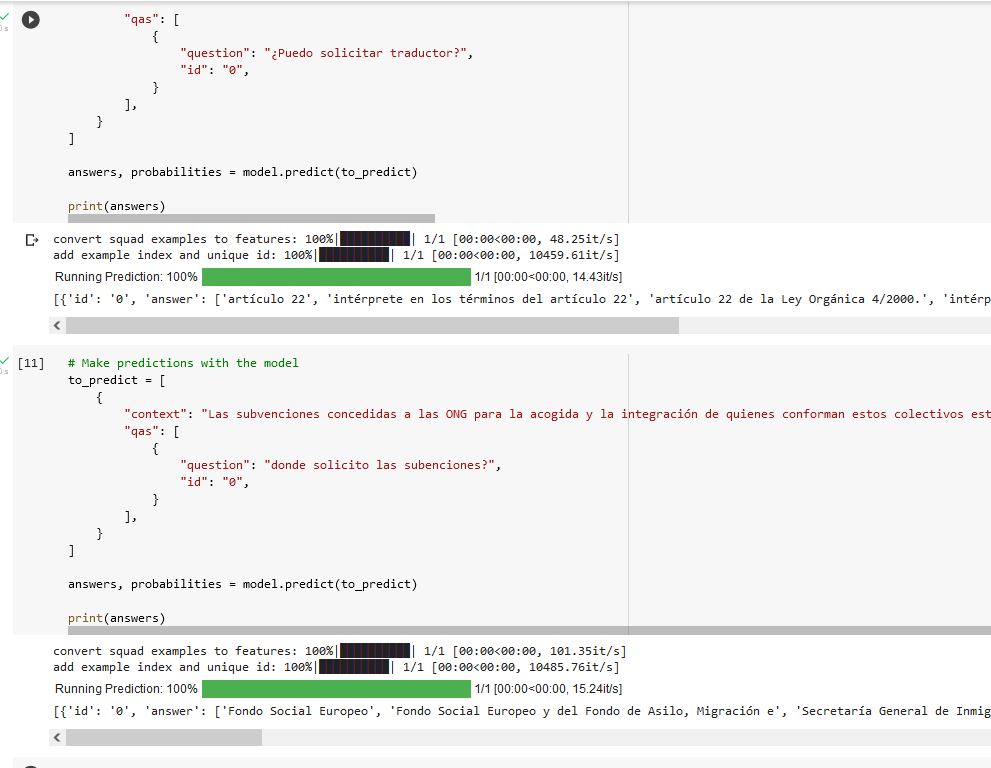

Ojo, si ejecuta dos veces da error por los datos guardado